Tamil Sentiment Analysis

Hey Everyone, 
Please perform the sentiment analysis on the attached dataset. 
Considering the following points:
1. Perform EDA
2. Perform vectorization techniques Bag of Words, tf-IDF, word2vec.
3. Evaluate your model's performance on precision, recall, ROC AUC score along with confusion matrix error analysis
4. Perform RandomizedSearchCV on the model(Use Naive Bayes, Logistic Regression, and SVM)
5. Run inference on the test set.

# ✈ **Steps to Complete Project**
## **1. Importing Libreries**
## **2. Reading Dataset**
## **3. Exploratory Data Analysis**
## **4. Cleaning and Preprocessing**
## **5. Model Training**

# 1.**Importing** Required **Libreries**

In [2]:
## For Dealing with warnings
import warnings
warnings.filterwarnings('ignore')

## Importing Required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## For Preprocessing
import re
import nltk
import nltk.corpus
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

## For Stemming and Lemmatization
import time
from gensim.utils import lemmatize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

## For Bag of Words
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

## Fro tf-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

## For Word2Vec
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 2. **Reading the Dataset**

In [3]:
path = r'/content/drive/MyDrive/Colab Notebooks/Datasets/Machine Learning Datasets/Tamil/Tamil_first_ready_for_sentiment.csv'

## Function for Reading the Dataset
def Read_csv(path):
  df = pd.read_csv(str(path), on_bad_lines = 'skip', sep = '\t', names = ['lable', 'Text'])
  df['Sentiment'] = df['lable']
  df = df.drop(['lable'], axis = 1)

  ## Dropping Duplicates values from Text column
  df = df.drop_duplicates()

  ## Reseting Index of the Data 
  df = df.reset_index(drop=True)
  return df

df = Read_csv(path)
df


,Text,Sentiment
0,Enna da ellam avan seyal Mari iruku,Negative
1,This movei is just like ellam avan seyal,Negative
2,Padam vanthathum 13k dislike pottavaga yellam...,Positive
3,Neraya neraya neraya... ... V era level...thala,Positive
4,wow thavala sema mass....padam oru pundaikum ...,Positive
...,...,...
15596,ivaru cinemala laam nalla tha prasuraaru...aa...,Mixed_feelings
15597,Pattaya Kilaputhupaa trailer... !!!!! Get Raj...,Positive
15598,En innum trending la varala? Ennada panringa ...,Mixed_feelings
15599,Rajnikant sir plz aap india ke pm ban jaao,not-Tamil


### **Taking a look** towards the Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15601 entries, 0 to 15600
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       15601 non-null  object
 1   Sentiment  15601 non-null  object
dtypes: object(2)
memory usage: 243.9+ KB


In [5]:
df.describe().transpose()

,count,unique,top,freq
Text,15601,15578,Adchi Oda vidu ellarayum orama nadandhu varar...,2
Sentiment,15601,5,Positive,10439


In [6]:
df['Sentiment'].value_counts()

Positive           10439
Negative            2032
Mixed_feelings      1790
unknown_state        847
not-Tamil            493
Name: Sentiment, dtype: int64

#### **Observation** of the Dataset

- There are **15601** Rows and **2** Columns.
- In this dataset **null values are not present**.
- For my Dependent Column, I have **five Categories** [Positive, Negative, Mixed_feelings, unknown_state, not-Tamil].
- **Positive catagory** has **Top** frequency in this dataset.

# 3. **Exploratory Data Analysis**

### **Countplot** of Sentiments

In [7]:
def countplot(dataset, xlabel, ylabel, xls, yls, xticks, yticks, xs, ys, title, ts):
  sns.set()
  plt.figure(figsize = (xs, ys))
  plot = sns.countplot(dataset)
  plot.set_xlabel(str(xlabel), fontsize=xls)
  plot.set_ylabel(str(ylabel), fontsize=yls)
  plt.xticks(fontsize = xticks)
  plt.yticks(fontsize = yticks)
  plot.set_title(str(title), fontsize=ts)
  plt.show()
  return plot

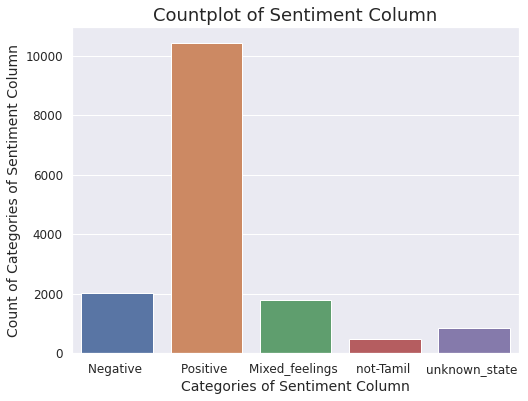

In [8]:
countplot(df['Sentiment'], 'Categories of Sentiment Column', 'Count of Categories of Sentiment Column', 14, 14, 12, 12, 8, 6, 'Countplot of Sentiment Column', 18);

#### Observations
- I have **five categories** but I have to predict only two **Positive or Negative**.
- So I will **delete those three categories**.
- All these **three categories** will **not help** to predict because they seems **neglegible against Positive category**.

### Lets check the **Length of Sentences** we have

In [9]:
def histogram(dataset, xlabel, ylabel, xls, yls, xticks, yticks, xs, ys, title, ts):
  sns.set()
  plt.figure(figsize = (xs, ys))
  plot = sns.histplot(dataset.str.len())
  plot.set_xlabel(str(xlabel), fontsize=xls)
  plot.set_ylabel(str(ylabel), fontsize=yls)
  plt.xticks(fontsize = xticks)
  plt.yticks(fontsize = yticks)
  plot.set_title(str(title), fontsize=ts)
  plot.set_xlim(0, 180)
  plt.show()
  return plot

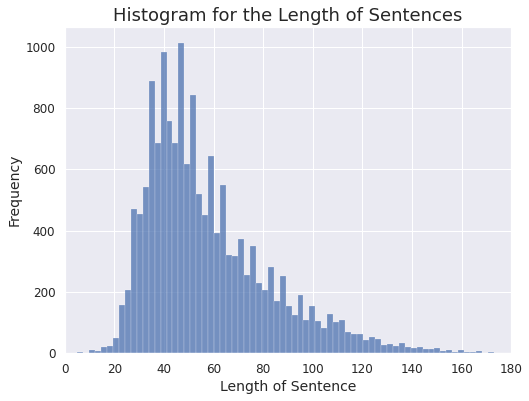

In [10]:
histogram(df['Text'], 'Length of Sentence', 'Frequency', 14, 14, 12, 12, 8, 6, 'Histogram for the Length of Sentences', 18);

#### Observations 
- In this dataset some sentences which have length above 100.
- And most of the sentences have length between 

### **Barchart** for Stopwords Present in Dataset

In [11]:
def plot_top_stopwords_barchart(text):
    stop = set(stopwords.words('english'))
    
    new = text.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    from collections import defaultdict
    dic = defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word] += 1
        
    top = sorted(dic.items(), key=lambda x:x[1], reverse=True)[:10]
    x, y = zip(*top)
    plt.bar(x, y)
    plt.title('Barchart of Stopwords', fontsize = 18)
    plt.xlabel('StopWords', fontsize = 15)
    plt.ylabel('Frequency of StopWords', fontsize = 15)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)


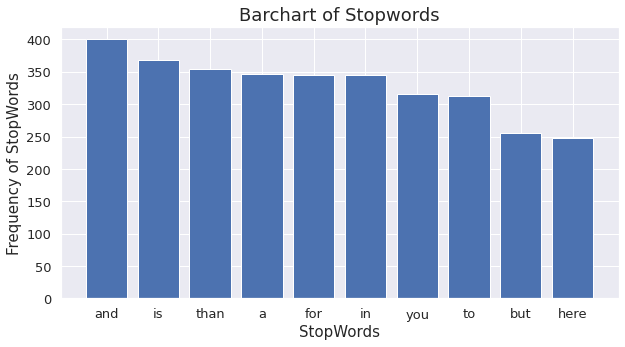

In [12]:
plt.figure(figsize=(10, 5))
plot_top_stopwords_barchart(df['Text'])

#### Observation
- We have to remove these stopwords.

### **Barchart** for Non - Stopwords Present in Dataset

In [13]:
def Non_stopwords(text):
  stop = set(stopwords.words('english'))

  new = text.str.split()
  new = new.values.tolist()
  corpus = [word for i in new for word in i]
  
  counter = Counter(corpus)
  most = counter.most_common()
  x, y = [], []
  for word, count in most[:40]:
    if (word not in stop):
      x.append(word)
      y.append(count)

  sns.barplot(x = y, y = x)
  plt.xticks(fontsize=(12))
  plt.yticks(fontsize=(12))
  plt.title('Barchart of Top Non - Stopwords', fontsize=18)
  plt.xlabel('Frequency of Non - Stopwords', fontsize=15)
  plt.ylabel('Top 40 Non - Stopwords', fontsize=15)

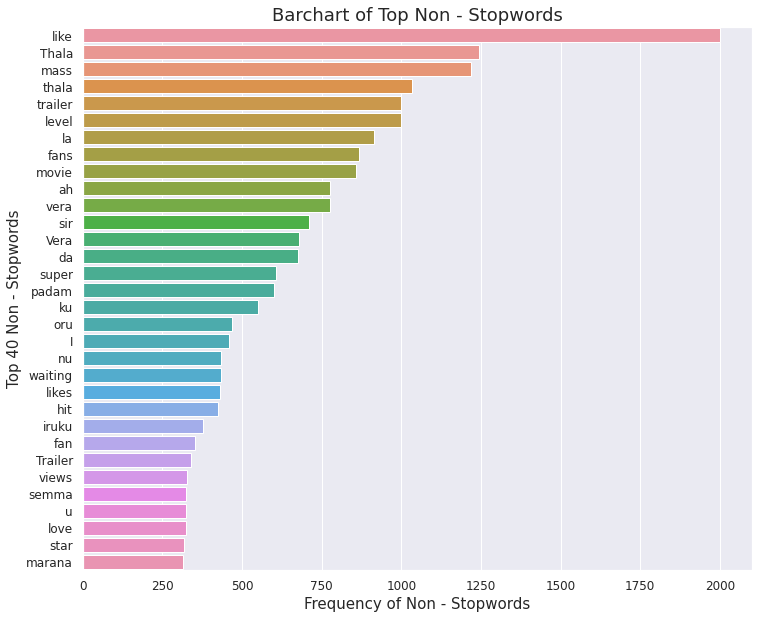

In [14]:
plt.figure(figsize=(12, 10))
Non_stopwords(df['Text'])

#### Observation
- These non-stopwords are very usefull for our model.
- We have to keep these words.

### **Barchart** of NGrams

In [15]:
def NGrams(text, n=2):
  stop = set(stopwords.words('english'))

  new = text.str.split()
  new = new.values.tolist()
  copus = [word for i in new for word in i]

  def _get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x:x[1], reverse=True)
    return words_freq[:10]

  top_n_bigrams = _get_top_ngram(text, n)[:10]
  x, y = map(list, zip(*top_n_bigrams))
  sns.barplot(x=y, y=x)

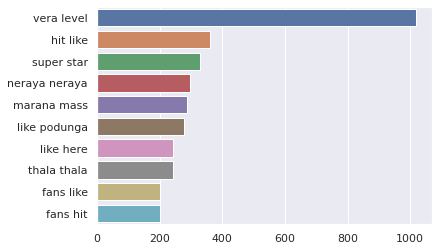

In [16]:
NGrams(df['Text'], n=2)

### **WordCloud** for **Negative** Sentiments

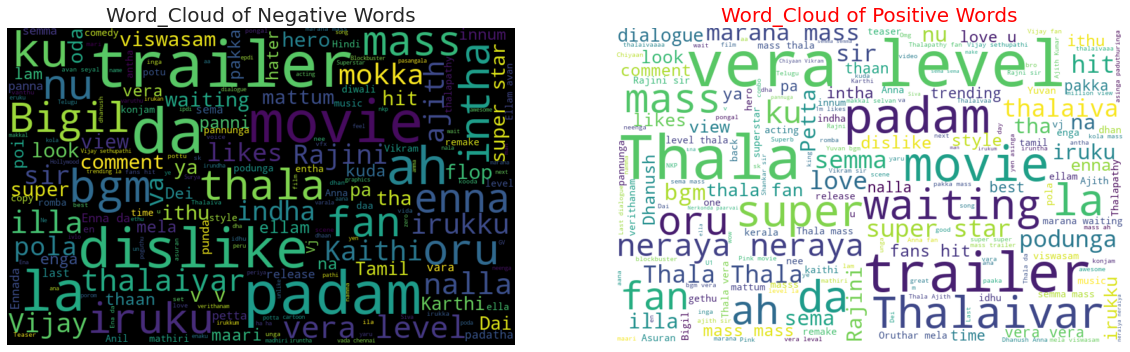

In [17]:
all_words_negative = " ".join([sentence for sentence in df['Text'][df['Sentiment'] == 'Negative ']])
all_words_positive = " ".join([sentence for sentence in df['Text'][df['Sentiment'] == 'Positive ']])

from wordcloud import WordCloud
wordcloud_negative = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words_negative)
wordcloud_positive = WordCloud(background_color="white", width=800, height=500, random_state=42, max_font_size=100).generate(all_words_positive)

#plot the graph
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word_Cloud of Negative Words', fontsize=20)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word_Cloud of Positive Words', fontsize=20, color="red")
plt.axis('off')
plt.show()

# 4.**Cleaning** and **Preprocessing**

### **Cleaning** the Data

Note :- In the above EDA, I have note down that there are Five Categories in the Sentiment Column.

So I have to delete these three categories name **['Mixed_feelings', 'not-Tamil', 'unkown_state']**

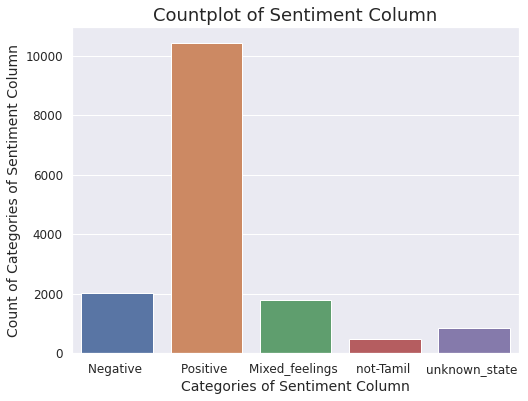

In [18]:
countplot(df['Sentiment'], 'Categories of Sentiment Column', 'Count of Categories of Sentiment Column', 14, 14, 12, 12, 8, 6, 'Countplot of Sentiment Column', 18);

In [19]:
## Deleting Those categories from Sentiment column

df = df[df['Sentiment'].str.contains("Mixed_feelings") == False]
df = df[df['Sentiment'].str.contains("not-Tamil") == False]
df = df[df['Sentiment'].str.contains("unknown_state") == False]
df = df.reset_index(drop=True)

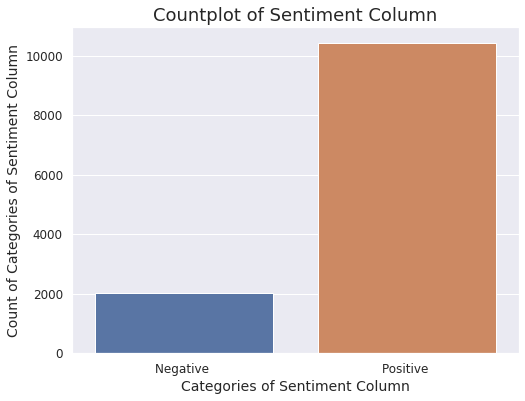

In [20]:
countplot(df['Sentiment'], 'Categories of Sentiment Column', 'Count of Categories of Sentiment Column', 14, 14, 12, 12, 8, 6, 'Countplot of Sentiment Column', 18);


#### Observation
- Here we can see I have imbalanced dataset.
- So I have to balence it.

### Converting Dependent Variable o numeric (0's and 1's)

In [21]:
values = {'Positive ': 1, 'Negative ': 0}
df['Sentiment'] = df['Sentiment'].map(values)

#### Capital case to Lower case

In [22]:
df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#### Remove Punctuation

In [23]:
df['Text'] = df['Text'].str.replace('[^\w\s]', '')
df['Text'] = df['Text'].str. replace('\d+', '')

#### Remove Emoji's

In [24]:
def Remove_emoji(text):
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', text)

df['Text'] = df['Text'].apply(lambda x: Remove_emoji(x))

#### Lemmatization

In [25]:
wnl = WordNetLemmatizer()
for i in range(0, 12471):
  words = nltk.word_tokenize(df['Text'][i])
  words = [wnl.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
  df['Text'][i] = ' '.join(words)

#### Removing Stopwords

In [26]:
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

#### Tokenization

In [27]:
# for i in range(0, 12471):
#   words = nltk.word_tokenize(df['Text'][i])
#   df['Text'][i] = words

### **Bag of Words**

In [28]:
cv = CountVectorizer(max_features=2000)
X = cv.fit_transform(df['Text']).toarray()


In [29]:
Bag_of_words_df = pd.DataFrame(X,columns=cv.get_feature_names())

In [30]:
Bag_of_words_df

,aa,aaa,aaaa,aaaaaa,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaasaaaa,aachu,aadukalam,aaga,aagala,aaganum,...,youtube,yov,yow,yr,yum,yuvan,zero,zimmer,தல,மஸ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12467,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12468,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12469,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **tf-IDF**

In [31]:
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['Text']).toarray()

In [32]:
tf_idf_df = pd.DataFrame(X_tfidf,columns=tfidf.get_feature_names())

In [33]:
tf_idf_df

,___,____,_kah,aa,aaa,aaaa,aaaaa,aaaaaa,aaaaaaa,aaaaaaaaaaaa,...,ഉണട,കടട,തല,മലയള,മലയളകൾ,മസസ,ലന,വയററഗ,സപപർ,ഹററ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Word2Vec**

In [34]:
for i in range(0, 12471):
  words = nltk.word_tokenize(df['Text'][i])
  df['Text'][i] = words


In [35]:
model = Word2Vec(df['Text'], min_count=1)

In [36]:
word2vec_df = model.wv.vocab

In [37]:
word2vec_df

{'enna': <gensim.models.keyedvectors.Vocab at 0x7f9d28b69cd0>,
 'da': <gensim.models.keyedvectors.Vocab at 0x7f9d28b69d10>,
 'ellam': <gensim.models.keyedvectors.Vocab at 0x7f9d28b69d50>,
 'avan': <gensim.models.keyedvectors.Vocab at 0x7f9d28b69d90>,
 'seyal': <gensim.models.keyedvectors.Vocab at 0x7f9d28b69e50>,
 'mari': <gensim.models.keyedvectors.Vocab at 0x7f9d28b69e90>,
 'iruku': <gensim.models.keyedvectors.Vocab at 0x7f9d28b69ed0>,
 'movei': <gensim.models.keyedvectors.Vocab at 0x7f9d28b69f10>,
 'like': <gensim.models.keyedvectors.Vocab at 0x7f9d28b69e10>,
 'padam': <gensim.models.keyedvectors.Vocab at 0x7f9d28b69dd0>,
 'vanthathum': <gensim.models.keyedvectors.Vocab at 0x7f9d28b69f50>,
 'k': <gensim.models.keyedvectors.Vocab at 0x7f9d28b69f90>,
 'dislike': <gensim.models.keyedvectors.Vocab at 0x7f9d28b69fd0>,
 'pottavaga': <gensim.models.keyedvectors.Vocab at 0x7f9d28b69b50>,
 'yellam': <gensim.models.keyedvectors.Vocab at 0x7f9d28b69ad0>,
 'yea': <gensim.models.keyedvectors.Voc

In [38]:
model.wv['like']

array([-0.10188382, -0.32773587, -0.28950754, -0.18695259,  0.7968496 ,
        0.49669197,  0.4658686 , -0.1496018 ,  0.4721114 ,  1.1617143 ,
        0.2262507 ,  0.899798  , -0.9175807 ,  1.3070052 ,  0.4933355 ,
       -0.48266068, -0.5316633 ,  1.5898616 ,  0.10435648, -0.0835552 ,
        0.2942449 , -0.20014907,  0.02280091,  0.60999066,  1.4667786 ,
        0.05491446, -0.3997479 ,  0.89671844,  1.4410353 , -0.439228  ,
        0.08529945, -1.0127275 , -0.9587777 , -0.46456888, -0.40936396,
        0.49306187,  0.7329743 ,  0.08300977,  0.20770365, -0.35635594,
       -0.66270447,  1.3124822 ,  0.4401717 , -0.51980114,  0.41713947,
        0.9019666 ,  0.13386534,  0.60954154, -1.5520731 , -0.12758522,
       -0.9756656 ,  0.27538884, -1.3131864 ,  1.3032691 , -0.6047589 ,
        0.9254382 ,  0.13612664,  0.42531052,  0.27249527,  0.5796265 ,
       -0.4706642 ,  0.05181736, -0.20248821, -0.06309796,  0.14675517,
        0.5525857 ,  0.3732172 ,  0.22007012, -0.29841918,  0.54

In [39]:
model.wv.most_similar('vera')

[('level', 0.9972785711288452),
 ('leval', 0.9777420163154602),
 ('mass', 0.9772078394889832),
 ('thala', 0.9735538959503174),
 ('lv', 0.9731249809265137),
 ('laval', 0.9716167449951172),
 ('u', 0.9655681848526001),
 ('overloaded', 0.964230477809906),
 ('yuvan', 0.9641844034194946),
 ('bgm', 0.963049590587616)]

# 5.**Model Training**

## **Model** Training with **Bag of Words**

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(Bag_of_words_df, df['Sentiment'], test_size=0.2, random_state=30, shuffle=True)

In [42]:
print("Shape of X_train", X_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of y_train", y_train.shape)
print("Shape of y_test", X_test.shape)

Shape of X_train (9976, 2000)
Shape of X_test (2495, 2000)
Shape of y_train (9976,)
Shape of y_test (2495, 2000)


In [43]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [44]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

### **Naive Bayes**

In [45]:
## GaussianNB
print("\t\tModel Performance\n")
print("\tGaussianNB")
gnb.fit(X_train, y_train)
y_pred_G = gnb.predict(X_test)
print("Accuracy Score : ", accuracy_score(y_test, y_pred_G))
print("\nConfusion Matrix")
print(confusion_matrix(y_test, y_pred_G))
print("\nPrecision Score : ", precision_score(y_test, y_pred_G))
print("\n")

## MultinomialNB
print("\tMultinomialNB")
mnb.fit(X_train, y_train)
y_pred_M = mnb.predict(X_test)
print("Accuracy Score : ", accuracy_score(y_test, y_pred_M))
print("\nConfusion Matrix")
print(confusion_matrix(y_test, y_pred_M))
print("\nPrecision Score : ", precision_score(y_test, y_pred_M))
print("\n")

## BernoulliNB
print("\tBernoulliNB")
bnb.fit(X_train, y_train)
y_pred_B = gnb.predict(X_test)
print("Accuracy Score : ", accuracy_score(y_test, y_pred_B))
print("\nConfusion Matrix")
print(confusion_matrix(y_test, y_pred_B))
print("\nPrecision Score : ", precision_score(y_test, y_pred_B))

		Model Performance

	GaussianNB
Accuracy Score :  0.3839679358717435

Confusion Matrix
[[ 314   93]
 [1444  644]]

Precision Score :  0.8738127544097694


	MultinomialNB
Accuracy Score :  0.8168336673346693

Confusion Matrix
[[ 167  240]
 [ 217 1871]]

Precision Score :  0.8863098057792516


	BernoulliNB
Accuracy Score :  0.3839679358717435

Confusion Matrix
[[ 314   93]
 [1444  644]]

Precision Score :  0.8738127544097694


**Logistic Regression**

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

In [47]:
lr = LogisticRegression()
lr_cv = LogisticRegressionCV(cv=5)

In [48]:
## Logistic Regression
print("Logistic Regression")
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Accuracy Score : ", accuracy_score(y_test, y_pred_lr))
print("\nConfusion Matrix")
print(confusion_matrix(y_test, y_pred_lr))
print("\nPrecision Score : ", precision_score(y_test, y_pred_lr))

Logistic Regression
Accuracy Score :  0.8468937875751503

Confusion Matrix
[[  86  321]
 [  61 2027]]

Precision Score :  0.8632879045996593


### **SVM (Support Vector Machine)**

In [49]:
from sklearn.svm import SVC

In [50]:
svc = SVC(kernel = 'sigmoid', gamma=1.0)

In [51]:
print("Support Vector Classifier\n")
svc.fit(X_train, y_train)
y_pred_svc = lr.predict(X_test)
print("Accuracy Score : ", accuracy_score(y_test, y_pred_svc))
print("\nConfusion Matrix")
print(confusion_matrix(y_test, y_pred_svc))
print("\nPrecision Score : ", precision_score(y_test, y_pred_svc))

Support Vector Classifier

Accuracy Score :  0.8468937875751503

Confusion Matrix
[[  86  321]
 [  61 2027]]

Precision Score :  0.8632879045996593


### **DataFrame for Analyse the Model Training**

In [52]:
model_train_df = pd.DataFrame(columns=['Model_Names', 'Accuracy_Score', 'Precision_Score', 'True_Positive', 'True_Negative', 'False_Positive', 'False_Negative'])

In [53]:
Model_Names = ['GaussianNB', 'MultinomialNB', 'BernoulliNB', 'Logistic Regressor', 'SVM']
model_train_df['Model_Names'] = Model_Names

In [54]:
model_train_df[model_train_df['Accuracy_Score']=='GaussianNB'] = f'{accuracy_score(y_test, y_pred_G)/100} %'

In [55]:
model_train_df['Accuracy_Score'][0] = f'{int(accuracy_score(y_test, y_pred_G)*100)} %'
model_train_df['Accuracy_Score'][1] = f'{int(accuracy_score(y_test, y_pred_M)*100)} %'
model_train_df['Accuracy_Score'][2] = f'{int(accuracy_score(y_test, y_pred_B)*100)} %'
model_train_df['Accuracy_Score'][3] = f'{int(accuracy_score(y_test, y_pred_lr)*100)} %'
model_train_df['Accuracy_Score'][4] = f'{int(accuracy_score(y_test, y_pred_svc)*100)} %'

model_train_df['Precision_Score'][0] = f'{int(precision_score(y_test, y_pred_G)*100)} %'
model_train_df['Precision_Score'][1] = f'{int(precision_score(y_test, y_pred_M)*100)} %'
model_train_df['Precision_Score'][2] = f'{int(precision_score(y_test, y_pred_B)*100)} %'
model_train_df['Precision_Score'][3] = f'{int(precision_score(y_test, y_pred_lr)*100)} %'
model_train_df['Precision_Score'][4] = f'{int(precision_score(y_test, y_pred_svc)*100)} %'


In [72]:
## True Positive
model_train_df['True_Positive'][0] = confusion_matrix(y_test, y_pred_G)[0][0]
model_train_df['True_Positive'][1] = confusion_matrix(y_test, y_pred_M)[0][0]
model_train_df['True_Positive'][2] = confusion_matrix(y_test, y_pred_B)[0][0]
model_train_df['True_Positive'][3] = confusion_matrix(y_test, y_pred_lr)[0][0]
model_train_df['True_Positive'][4] = confusion_matrix(y_test, y_pred_svc)[0][0]

## True Negative
model_train_df['True_Negative'][0] = confusion_matrix(y_test, y_pred_G)[1][1]
model_train_df['True_Negative'][1] = confusion_matrix(y_test, y_pred_M)[1][1]
model_train_df['True_Negative'][2] = confusion_matrix(y_test, y_pred_B)[1][1]
model_train_df['True_Negative'][3] = confusion_matrix(y_test, y_pred_lr)[1][1]
model_train_df['True_Negative'][4] = confusion_matrix(y_test, y_pred_svc)[1][1]

## False Positive
model_train_df['False_Positive'][0] = confusion_matrix(y_test, y_pred_G)[0][1]
model_train_df['False_Positive'][1] = confusion_matrix(y_test, y_pred_M)[0][1]
model_train_df['False_Positive'][2] = confusion_matrix(y_test, y_pred_B)[0][1]
model_train_df['False_Positive'][3] = confusion_matrix(y_test, y_pred_lr)[0][1]
model_train_df['False_Positive'][4] = confusion_matrix(y_test, y_pred_svc)[0][1]

## False Negative
model_train_df['False_Negative'][0] = confusion_matrix(y_test, y_pred_G)[1][0]
model_train_df['False_Negative'][1] = confusion_matrix(y_test, y_pred_M)[1][0]
model_train_df['False_Negative'][2] = confusion_matrix(y_test, y_pred_B)[1][0]
model_train_df['False_Negative'][3] = confusion_matrix(y_test, y_pred_lr)[1][0]
model_train_df['False_Negative'][4] = confusion_matrix(y_test, y_pred_svc)[1][0]

In [105]:
model_train_df.sort_values('Accuracy_Score', ascending=False)

,Model_Names,Accuracy_Score,Precision_Score,True_Positive,True_Negative,False_Positive,False_Negative
3,Logistic Regressor,84 %,86 %,86,2027,321,61
4,SVM,84 %,86 %,86,2027,321,61
1,MultinomialNB,81 %,88 %,167,1871,240,217
0,GaussianNB,38 %,87 %,314,644,93,1444
2,BernoulliNB,38 %,87 %,314,644,93,1444


#### Observations for Bag Of Words
- Here Logistic Regressor and SVM both are giving top and same result.
- We can use any of them for my predictions of Negative and Positive.

## **Model** Training with **tf-IDF**

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X_train, X_test, y_train, y_test = train_test_split(tf_idf_df, df['Sentiment'], test_size=0.2, random_state=30, shuffle=True)

In [113]:
print("Shape of X_train", X_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of y_train", y_train.shape)
print("Shape of y_test", X_test.shape)

Shape of X_train (9976, 19774)
Shape of X_test (2495, 19774)
Shape of y_train (9976,)
Shape of y_test (2495, 19774)


In [114]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [115]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

### **Naive Bayes**

In [116]:
## GaussianNB
print("\t\tModel Performance\n")
print("\tGaussianNB")
gnb.fit(X_train, y_train)
y_pred_G = gnb.predict(X_test)
print("Accuracy Score : ", accuracy_score(y_test, y_pred_G))
print("\nConfusion Matrix")
print(confusion_matrix(y_test, y_pred_G))
print("\nPrecision Score : ", precision_score(y_test, y_pred_G))
print("\n")

## MultinomialNB
print("\tMultinomialNB")
mnb.fit(X_train, y_train)
y_pred_M = mnb.predict(X_test)
print("Accuracy Score : ", accuracy_score(y_test, y_pred_M))
print("\nConfusion Matrix")
print(confusion_matrix(y_test, y_pred_M))
print("\nPrecision Score : ", precision_score(y_test, y_pred_M))
print("\n")

## BernoulliNB
print("\tBernoulliNB")
bnb.fit(X_train, y_train)
y_pred_B = gnb.predict(X_test)
print("Accuracy Score : ", accuracy_score(y_test, y_pred_B))
print("\nConfusion Matrix")
print(confusion_matrix(y_test, y_pred_B))
print("\nPrecision Score : ", precision_score(y_test, y_pred_B))

		Model Performance

	GaussianNB
Accuracy Score :  0.5146292585170341

Confusion Matrix
[[ 225  182]
 [1029 1059]]

Precision Score :  0.8533440773569702


	MultinomialNB
Accuracy Score :  0.8380761523046092

Confusion Matrix
[[   3  404]
 [   0 2088]]

Precision Score :  0.8378812199036918


	BernoulliNB
Accuracy Score :  0.5146292585170341

Confusion Matrix
[[ 225  182]
 [1029 1059]]

Precision Score :  0.8533440773569702


### **Logistic Regression**

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

In [118]:
lr = LogisticRegression()
lr_cv = LogisticRegressionCV(cv=5)

In [119]:
## Logistic Regression
print("Logistic Regression")
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Accuracy Score : ", accuracy_score(y_test, y_pred_lr))
print("\nConfusion Matrix")
print(confusion_matrix(y_test, y_pred_lr))
print("\nPrecision Score : ", precision_score(y_test, y_pred_lr))

Logistic Regression
Accuracy Score :  0.8408817635270541

Confusion Matrix
[[  22  385]
 [  12 2076]]

Precision Score :  0.8435595286468915


### **SVM (Support Vector Machine)**

In [120]:
from sklearn.svm import SVC

In [121]:
svc = SVC(kernel = 'sigmoid', gamma=1.0)

In [122]:
print("Support Vector Classifier\n")
svc.fit(X_train, y_train)
y_pred_svc = lr.predict(X_test)
print("Accuracy Score : ", accuracy_score(y_test, y_pred_svc))
print("\nConfusion Matrix")
print(confusion_matrix(y_test, y_pred_svc))
print("\nPrecision Score : ", precision_score(y_test, y_pred_svc))

Support Vector Classifier

Accuracy Score :  0.8408817635270541

Confusion Matrix
[[  22  385]
 [  12 2076]]

Precision Score :  0.8435595286468915


### **DataFrame for Analyse the Model Training**

In [132]:
model_train_tfidf_df = pd.DataFrame(columns=['Model_Names', 'Accuracy_Score', 'Precision_Score', 'True_Positive', 'True_Negative', 'False_Positive', 'False_Negative'])

In [133]:
Model_Names = ['GaussianNB', 'MultinomialNB', 'BernoulliNB', 'Logistic Regressor', 'SVM']
model_train_tfidf_df['Model_Names'] = Model_Names

In [134]:
model_train_tfidf_df[model_train_df['Accuracy_Score']=='GaussianNB'] = f'{accuracy_score(y_test, y_pred_G)/100} %'

In [135]:
model_train_tfidf_df['Accuracy_Score'][0] = f'{int(accuracy_score(y_test, y_pred_G)*100)} %'
model_train_tfidf_df['Accuracy_Score'][1] = f'{int(accuracy_score(y_test, y_pred_M)*100)} %'
model_train_tfidf_df['Accuracy_Score'][2] = f'{int(accuracy_score(y_test, y_pred_B)*100)} %'
model_train_tfidf_df['Accuracy_Score'][3] = f'{int(accuracy_score(y_test, y_pred_lr)*100)} %'
model_train_tfidf_df['Accuracy_Score'][4] = f'{int(accuracy_score(y_test, y_pred_svc)*100)} %'

model_train_tfidf_df['Precision_Score'][0] = f'{int(precision_score(y_test, y_pred_G)*100)} %'
model_train_tfidf_df['Precision_Score'][1] = f'{int(precision_score(y_test, y_pred_M)*100)} %'
model_train_tfidf_df['Precision_Score'][2] = f'{int(precision_score(y_test, y_pred_B)*100)} %'
model_train_tfidf_df['Precision_Score'][3] = f'{int(precision_score(y_test, y_pred_lr)*100)} %'
model_train_tfidf_df['Precision_Score'][4] = f'{int(precision_score(y_test, y_pred_svc)*100)} %'


In [137]:
## True Positive
model_train_tfidf_df['True_Positive'][0] = confusion_matrix(y_test, y_pred_G)[0][0]
model_train_tfidf_df['True_Positive'][1] = confusion_matrix(y_test, y_pred_M)[0][0]
model_train_tfidf_df['True_Positive'][2] = confusion_matrix(y_test, y_pred_B)[0][0]
model_train_tfidf_df['True_Positive'][3] = confusion_matrix(y_test, y_pred_lr)[0][0]
model_train_tfidf_df['True_Positive'][4] = confusion_matrix(y_test, y_pred_svc)[0][0]

## True Negative
model_train_tfidf_df['True_Negative'][0] = confusion_matrix(y_test, y_pred_G)[1][1]
model_train_tfidf_df['True_Negative'][1] = confusion_matrix(y_test, y_pred_M)[1][1]
model_train_tfidf_df['True_Negative'][2] = confusion_matrix(y_test, y_pred_B)[1][1]
model_train_tfidf_df['True_Negative'][3] = confusion_matrix(y_test, y_pred_lr)[1][1]
model_train_tfidf_df['True_Negative'][4] = confusion_matrix(y_test, y_pred_svc)[1][1]

## False Positive
model_train_tfidf_df['False_Positive'][0] = confusion_matrix(y_test, y_pred_G)[0][1]
model_train_tfidf_df['False_Positive'][1] = confusion_matrix(y_test, y_pred_M)[0][1]
model_train_tfidf_df['False_Positive'][2] = confusion_matrix(y_test, y_pred_B)[0][1]
model_train_tfidf_df['False_Positive'][3] = confusion_matrix(y_test, y_pred_lr)[0][1]
model_train_tfidf_df['False_Positive'][4] = confusion_matrix(y_test, y_pred_svc)[0][1]

## False Negative
model_train_tfidf_df['False_Negative'][0] = confusion_matrix(y_test, y_pred_G)[1][0]
model_train_tfidf_df['False_Negative'][1] = confusion_matrix(y_test, y_pred_M)[1][0]
model_train_tfidf_df['False_Negative'][2] = confusion_matrix(y_test, y_pred_B)[1][0]
model_train_tfidf_df['False_Negative'][3] = confusion_matrix(y_test, y_pred_lr)[1][0]
model_train_tfidf_df['False_Negative'][4] = confusion_matrix(y_test, y_pred_svc)[1][0]

In [138]:
model_train_tfidf_df.sort_values('Accuracy_Score', ascending=False)

,Model_Names,Accuracy_Score,Precision_Score,True_Positive,True_Negative,False_Positive,False_Negative
3,Logistic Regressor,84 %,84 %,22,2076,385,12
4,SVM,84 %,84 %,22,2076,385,12
1,MultinomialNB,83 %,83 %,3,2088,404,0
0,GaussianNB,51 %,85 %,225,1059,182,1029
2,BernoulliNB,51 %,85 %,225,1059,182,1029


#### Observations for tf-idf
- Here Logistic Regressor and SVM both are giving top and same result.
- We can use any of them for my predictions of Negative and Positive.

# **Model has been Trained**